<a href="https://colab.research.google.com/github/kkewat/Neural-Networks/blob/main/Diabetics_Prediction_Using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

ipoerting the dataset

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Checking for any null values in the dataset

In [4]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Checking the Data types of the columns

In [8]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Seperating the Target variable from features

In [9]:
X = df.drop('Outcome',axis=1)
y = df['Outcome']

In [10]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [11]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

Splitting the features into train test set

In [12]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

Importing the tensorflow libraries

In [15]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

initializing the model

In [17]:
model = Sequential()
# adding the layers in model and telling the no. of columns we have i.e. the input_shape
model.add(Dense(8,activation='relu',input_shape=(8,)))

Adding the Hidden Layers

In [18]:
model.add(Dense(8,activation='relu'))

Adding the Output Layer

In [19]:
model.add(Dense(1,activation='sigmoid'))

Compiling the Model

In [20]:
model.compile(loss='binary_crossentropy',optimizer='sgd',metrics=['accuracy'])

fitting the features in the model

In [23]:
model.fit(X_train,y_train,epochs=10,batch_size=1,verbose=1)

Epoch 1/10
614/614 [==============================] - 1s 2ms/step - loss: 0.7164 - accuracy: 0.6450
Epoch 2/10
614/614 [==============================] - 1s 2ms/step - loss: 0.6529 - accuracy: 0.6401
Epoch 3/10
614/614 [==============================] - 1s 2ms/step - loss: 0.6456 - accuracy: 0.6466
Epoch 4/10
614/614 [==============================] - 1s 2ms/step - loss: 0.6450 - accuracy: 0.6547
Epoch 5/10
614/614 [==============================] - 1s 2ms/step - loss: 0.6377 - accuracy: 0.6661
Epoch 6/10
614/614 [==============================] - 1s 2ms/step - loss: 0.6444 - accuracy: 0.6482
Epoch 7/10
614/614 [==============================] - 1s 2ms/step - loss: 0.6416 - accuracy: 0.6547
Epoch 8/10
614/614 [==============================] - 1s 2ms/step - loss: 0.6397 - accuracy: 0.6547
Epoch 9/10
614/614 [==============================] - 1s 2ms/step - loss: 0.6437 - accuracy: 0.6531
Epoch 10/10
614/614 [==============================] - 1s 2ms/step - loss: 0.6361 - accuracy: 0.6564

Evaluating our model

In [26]:
score=model.evaluate(X_test,y_test,verbose=1)
print(score)

5/5 [==============================] - 0s 3ms/step - loss: 0.6161 - accuracy: 0.6494
[0.6160746812820435, 0.649350643157959]


5/5 [==============================] - 0s 2ms/step


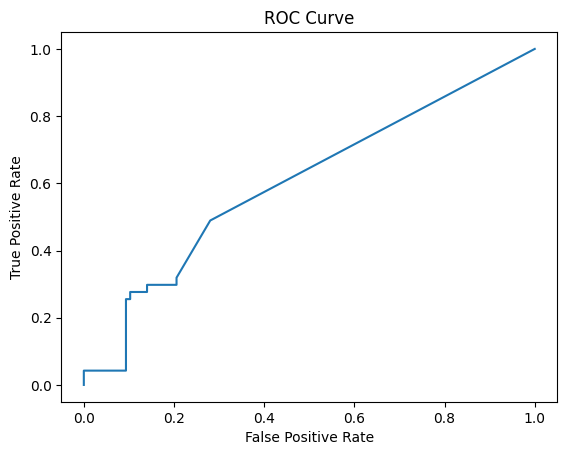

In [28]:

from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Predicting the test set
y_pred = model.predict(X_test)

# Calculating the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plotting the ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


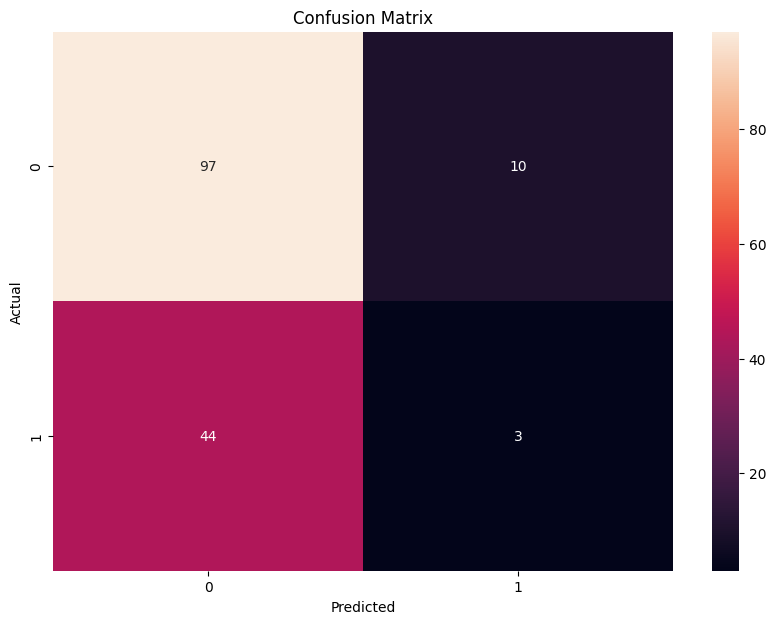

In [30]:
from sklearn.metrics import confusion_matrix
#y_pred=y_pred.round()
cm=confusion_matrix(y_test,y_pred)
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
